In [ ]:
# LOADING THE DATAFILE FOR TRAIN AND TEST DATA
with open('ridgetrain.txt', 'r') as file:
    train = file.read()
with open('ridgetest.txt', 'r') as file:
    test = file.read()

In [ ]:
import math
# CONVERT TRAIN DATA IN TO LIST OS LISTS FORM
temp = train.split( )
train_set=[]
for i in range (0,len(temp),2):
  temp1 = []
  temp1.append(float(temp[i]))
  temp1.append(float(temp[i+1]))
  train_set.append(temp1)
print(train_set)

[[0.78156313, 1.4142032], [-8.8777555, -1.3742235], [7.2344689, 1.3948], [-8.4769539, -1.3955995], [-3.5871743, -0.47137727], [0.38076152, 1.3000095], [6.7134269, 1.3259554], [-9.9198397, -0.40485343], [8.4368737, 0.28443342], [5.2705411, -0.31861559], [5.2304609, -0.37356957], [1.0621242, 1.3604099], [-5.1903808, 1.3479175], [6.6733467, 1.3051854], [-1.6232465, -1.0510509], [-5.5511022, 1.4122041], [8.1162325, 0.70655381], [1.1823647, 1.3042415], [-7.0340681, 0.048802363], [8.5571142, 0.1162099], [-9.4789579, -0.94437917], [6.8336673, 1.3753706], [-5.1503006, 1.3296883], [6.0320641, 0.7201443], [-5.3507014, 1.3989434], [-8.9579158, -1.3430714], [1.9839679, 0.51433591], [9.8797595, -1.3377149], [9.9198397, -1.3550254], [-8.5170341, -1.4036424], [-5.4308617, 1.4110476], [-1.1422846, -0.49406757], [-5.3106212, 1.3895151], [0.26052104, 1.2238399], [-7.3547094, -0.39914453], [2.9458918, -0.78645755], [0.66132265, 1.4033418], [6.993988, 1.4102807], [-2.5851703, -1.3773017], [-5.5911824, 1.4

In [ ]:
# CONVERT TEST DATA IN TO LIST OS LISTS FORM
temp = test.split( )
test_set=[]
for i in range (0,len(temp),2):
  temp1 = []
  temp1.append(float(temp[i]))
  temp1.append(float(temp[i+1]))
  test_set.append(temp1)
print(test_set)

[[-1.3026052, -0.69926415], [7.2745491, 1.3843227], [-9.759519, -0.61597077], [8.0761523, 0.75507399], [8.5971944, 0.059641484], [6.4328657, 1.1379409], [9.3587174, -0.93180631], [10.0, -1.3830926], [-5.7915832, 1.3536166], [5.1903808, -0.42792352], [-2.8256513, -1.2612157], [-2.6252505, -1.3633334], [-4.6292585, 0.9135119], [-8.7174349, -1.4099076], [-3.6272545, -0.41757241], [8.5170341, 0.17259166], [-1.6633267, -1.0881205], [6.1122244, 0.81529247], [3.5871743, -1.333343], [-0.42084168, 0.50421657], [-9.7194389, -0.66648527], [-7.7154309, -0.85230927], [5.6713427, 0.24421426], [1.2224449, 1.2812855], [-8.9178357, -1.3597395], [-7.8356713, -0.9815231], [-3.4669339, -0.6279096], [3.8677355, -1.4117315], [3.507014, -1.2913161], [-6.753507, 0.43824946], [-4.8296593, 1.1101334], [1.8236473, 0.71803786], [7.3947896, 1.3396349], [4.98998, -0.68767875], [-5.2705411, 1.3778549], [-1.0220441, -0.33155297], [-1.743487, -1.1569596], [-1.5831663, -1.0122932], [4.1482966, -1.3797232], [9.7995992, 

In [ ]:
import numpy as np
# FUNCTION FOR RBF KERNEL
def rbf_kernel(a,b):
  dist = ((np.linalg.norm(a-b))**2)*-0.1
  return math.exp(dist)

ROOT MEAN SQUARE ERROR FOR (L =  2 ) IS  0.9741169411023111


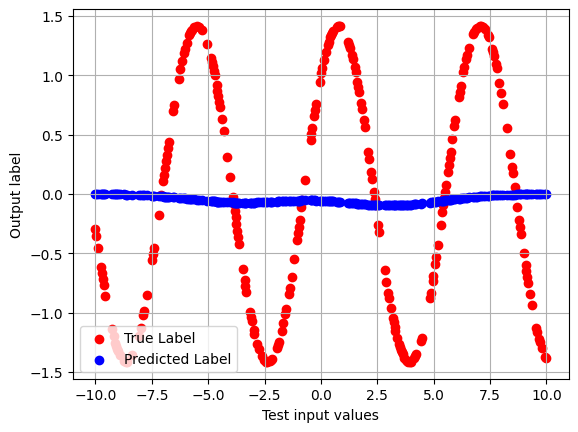

ROOT MEAN SQUARE ERROR FOR (L =  5 ) IS  0.8230926514588197


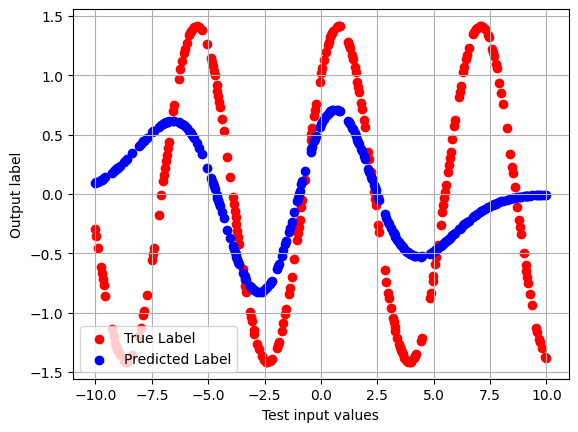

ROOT MEAN SQUARE ERROR FOR (L =  20 ) IS  0.2143447759675113


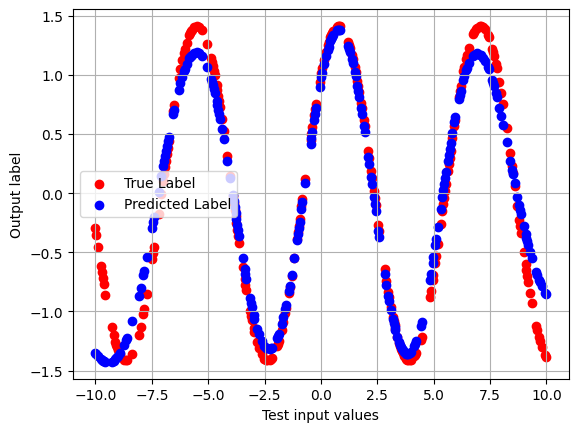

ROOT MEAN SQUARE ERROR FOR (L =  50 ) IS  0.0656619678520279


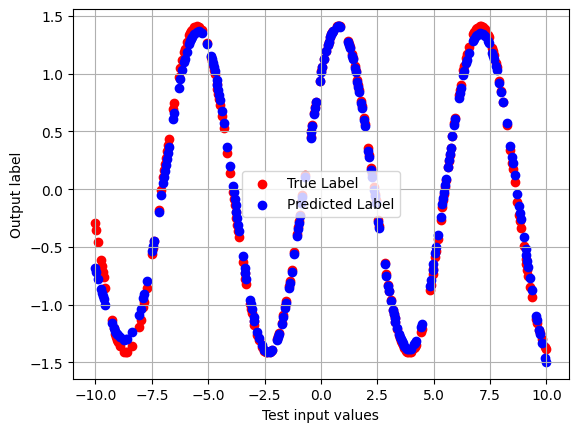

ROOT MEAN SQUARE ERROR FOR (L =  100 ) IS  0.06360508939047044


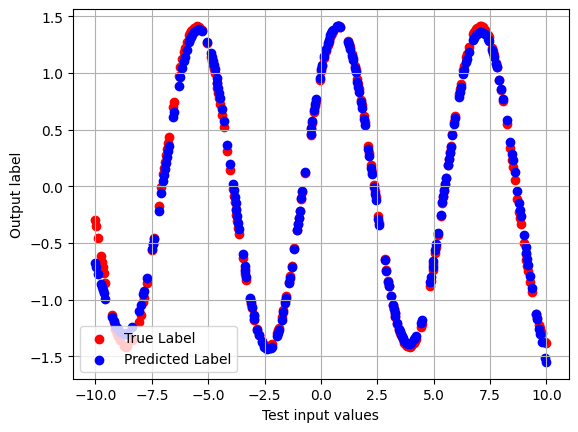

In [ ]:
import matplotlib.pyplot as plt
import random
lambda_value = 0.1
# L IS NUMBER OF LANDMARKS TO BE CHOOSEN
Ls=[2, 5, 20, 50, 100]
for L in Ls:
  landmark = []
  # SELECTING L RANDOM LANDMARKS
  for i in range(0,L):
    index = random.randint(0, len(train_set)-1)
    landmark.append(train_set[index][0])

  new_train_set = []
  new_test_set = []
  # APPLYING RBF KERNEL ON TRAIN DATA AND LANDMARK
  for i in range(0,len(train_set)):
    temp = []
    for j in range(0,L):
      temp.append(rbf_kernel(train_set[i][0],landmark[j]))
    new_train_set.append(temp)
  # APPLYING RBF KERNEL ON TEST DATA AND LANDMARK
  for i in range(0,len(test_set)):
    temp = []
    for j in range(0,L):
      temp.append(rbf_kernel(test_set[i][0],landmark[j]))
    new_test_set.append(temp)

  identity_matrix = np.identity(L)
  alpha = np.dot(np.transpose(new_train_set),new_train_set)
  alpha = alpha + lambda_value*identity_matrix
  inverse_matrix = np.linalg.inv(alpha)

  y = []
  for i in range(len(train_set)):
    y.append(train_set[i][1])

  w = np.dot(np.transpose(new_train_set),y)
  w = np.dot(inverse_matrix,w)

  #PREDICTION
  prediction = []
  for i in range(0,len(test_set)):
    prediction.append(np.dot(w,np.transpose(new_test_set[i])))
  # print(prediction)

  # RMSE VALUE CALCULATION
  sum = 0
  for i in range(0,len(prediction)):
    sum += (test_set[i][1]-prediction[i])**2
  MSE = sum/len(prediction)
  RMSE = math.sqrt(MSE)
  print("ROOT MEAN SQUARE ERROR FOR (L = ",L,") IS ",RMSE)

  # SCATTER PLOT
  test_data=[]
  test_label=[]
  for i in range(0,len(test_set)):
    test_data.append(test_set[i][0])
    test_label.append(test_set[i][1])
  plt.scatter(test_data,test_label, color='r', label='True Label')
  plt.scatter(test_data,prediction, color='b', label='Predicted Label')
  plt.xlabel('Test input values')
  plt.ylabel('Output label')
  plt.legend()
  plt.grid()
  plt.show()